# Module 13 - Practice Notebook
This notebook includes TODO markers **inside code cells** so students complete the missing parts.

In [1]:
#Import all required libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt


## Load Insurance Dataset

In [3]:
# Load the insurance dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)

# TODO: Display first 5 rows
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

In [4]:
# TODO: Print dataset info
insurance.info()


# TODO: Print descriptive statistics

insurance.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Define Features and Target

In [5]:
# TODO: Set numeric and categorical feature lists
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

# TODO: Define target column
target = "charges"

# TODO: Create X and y
X = insurance.drop(columns=target)
y = insurance[target]



# TODO: Display X head
X.head()


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


## Train Test Split

In [14]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1070, 6), (268, 6))

## Multiple Linear Regression Pipeline

In [15]:
# Build preprocessing transformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

# TODO: Build full pipeline with LinearRegression
mlr_model = Pipeline(
    [
        ("preprocess", preprocess),
        ("linreg", LinearRegression())
    ]
)

# TODO: Fit the model
mlr_model.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linreg', LinearRegression())])

## Regression Performance Function

In [16]:
# TODO: Complete function to print performance
def regression_performance(y_true, y_pred, label = "Model"):
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  rmse = np.sqrt(mse)

  print(f"{label} Performance:")
  print("MSE : ", mse)
  print("RMSE: ", rmse)
  print("MAE : ", mae)
  print("R2  : ", r2)
  print()


## Evaluate Model

In [17]:
# Predict for train and test sets
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

# TODO: Print train and test performance
print(regression_performance(y_train , y_train_pred, "Train"))
print(regression_performance(y_test , y_test_pred, "Test"))


Train Performance:
MSE :  37277681.70201866
RMSE:  6105.545160099847
MAE :  4208.234572492228
R2  :  0.7417255854683333

None
Test Performance:
MSE :  33596915.851361446
RMSE:  5796.284659276272
MAE :  4181.194473753651
R2  :  0.7835929767120724

None


## Inspect Coefficients

In [18]:
# Extract feature names after OneHotEncoding
ohe = mlr_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(cat_feature_names)

# Extract model coefficients
linreg = mlr_model.named_steps["linreg"]
coeffs = pd.DataFrame({"feature": all_feature_names, "coefficient": linreg.coef_})

# Print intercept and coefficients
print("Intercept:", linreg.intercept_)
coeffs.sort_values("coefficient", ascending=False)


Intercept: -11931.219050326667


,feature,coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


## Plot Actual vs Predicted

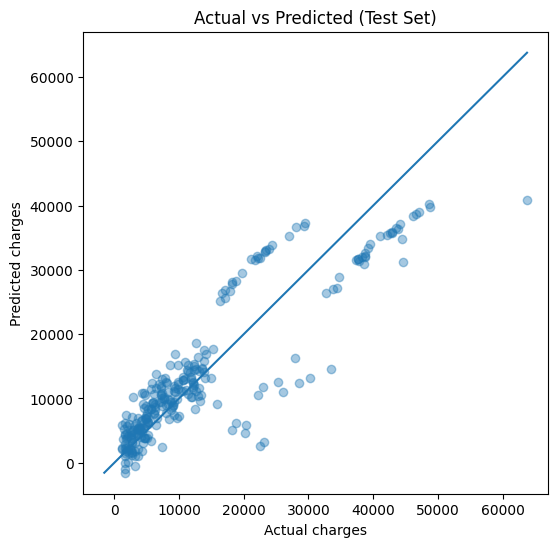

In [19]:
# Plot scatter of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Test Set)")

# Add diagonal line
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims)

plt.show()


## Part B: Polynomial Regression Practice

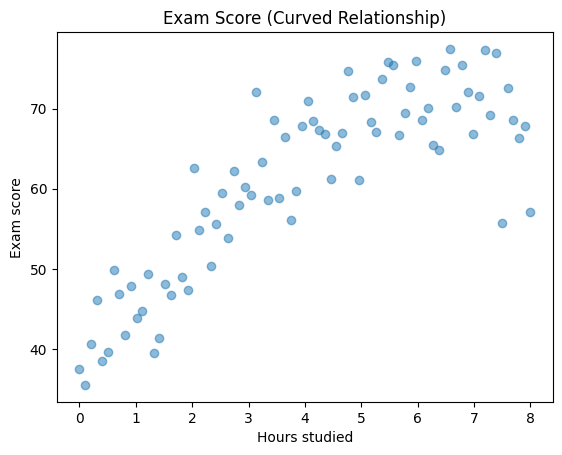

In [20]:
# Generate synthetic curved dataset
np.random.seed(42)

X_hours = np.linspace(0, 8, 80).reshape(-1, 1)
noise = np.random.normal(0, 5, size=X_hours.shape[0])

y_scores = 35 + 12 * X_hours[:, 0] - 1 * (X_hours[:, 0] ** 2) + noise

# Plot the data
plt.scatter(X_hours, y_scores, alpha=0.5)
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Exam Score (Curved Relationship)")
plt.show()


In [21]:
# Train test split for polynomial data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hours, y_scores, test_size=0.2, random_state=42
)


In [27]:
# TODO: Create helper to fit polynomial model
def fit_poly_model(X_train, y_train, degree):
  model = Pipeline(
      [
          ("poly", PolynomialFeatures(degree, include_bias=False)),
          ("linreg", LinearRegression())
      ]
  )
  model.fit(X_train, y_train)
  return model


In [28]:
# TODO: Fit models for degrees 1, 2, 3, 8
degrees = [1,2,3,4]
models = {}
results = []
for d in degrees:
  model = fit_poly_model(X_train_h, y_train_h, d)
  models[d] = model
  # Predictions
  y_train_pred_deg = model.predict(X_train_h)
  y_test_pred_deg = model.predict(X_test_h)
  # Train metrics
  mae_train = mean_absolute_error(y_train_h, y_train_pred_deg)
  mse_train = mean_squared_error(y_train_h, y_train_pred_deg)
  rmse_train = np.sqrt(mse_train)
  r2_train = r2_score(y_train_h, y_train_pred_deg)
  #Test metrics
  mae_test = mean_absolute_error(y_test_h, y_test_pred_deg)
  mse_test = mean_squared_error(y_test_h, y_test_pred_deg) # Corrected: use mean_squared_error
  rmse_test = np.sqrt(mse_test)
  r2_test = r2_score(y_test_h, y_test_pred_deg)

  # Append results
  results.append(
      { 'degree': d,
       'MAE_train': mae_train,
        'RMSE_train': rmse_train,
        'R2_train': r2_train,
        'MAE_test': mae_test,
        'RMSE_test': rmse_test,
        'R2_test': r2_test, }
      )
results_df = pd.DataFrame(results)
print(results_df)

   degree  MAE_train  RMSE_train  R2_train  MAE_test  RMSE_test   R2_test
0       1   5.385102    6.627386  0.655538  3.666822   5.206104  0.794243
1       2   3.833707    4.824255  0.817477  3.518008   4.305022  0.859304
2       3   3.817058    4.601789  0.833923  3.382100   4.418552  0.851786
3       4   3.797943    4.600529  0.834014  3.455752   4.461148  0.848914


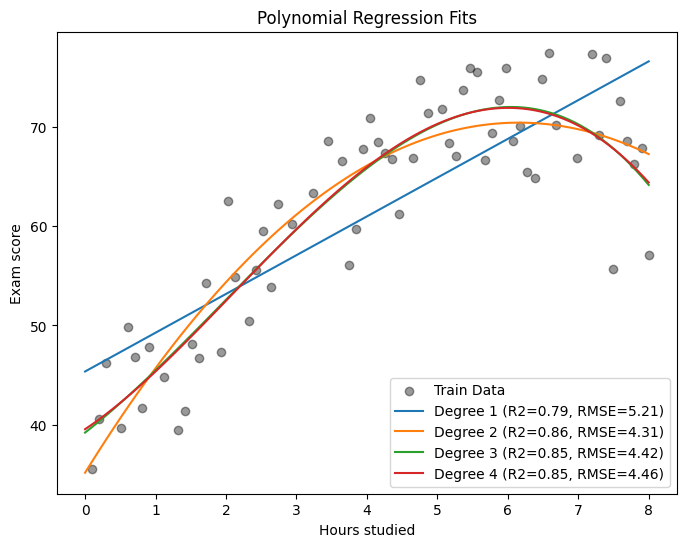

In [29]:
# TODO: Plot fitted curves for each degree (R2,RMSE)
plt.figure(figsize=(8, 6))

plt.scatter(X_train_h, y_train_h, color="black", alpha=0.4, label="Train Data")

X_plot = np.linspace(0, 8, 100).reshape(-1, 1)

for d, model in models.items():
    y_pred = model.predict(X_plot)
    y_test_pred = model.predict(X_test_h)

    r2 = r2_score(y_test_h, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test_h, y_test_pred))

    plt.plot(X_plot, y_pred, label=f"Degree {d} (R2={r2:.2f}, RMSE={rmse:.2f})")

plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Polynomial Regression Fits")
plt.legend()
plt.show()





## TODO: Final Reflection
Write answers to:
1. Which polynomial degree overfits and why
2. Which degree gives best generalization
3. What you learned about MLR and polynomial regression.

📝 TODO: Final Reflection (Text Answer)

1️⃣ Which polynomial degree overfits and why?
Degree 8 overfits because it is too complex and tries to fit noise in the training data, causing poor performance on unseen data.

2️⃣ Which degree gives best generalization?
Degree 2 or 3 gives best generalization because the true relationship is quadratic and these models balance bias and variance well.

3️⃣ What you learned about MLR and Polynomial Regression?
Multiple Linear Regression works well for linear relationships with multiple features.
Polynomial regression can model non-linear patterns, but higher degree models can easily overfit if not chosen carefully.